In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,6)
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import joblib
#TPOT

In [2]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler().fit(df[['WQI']])
# df['WQI'] = scaler.transform(df[['WQI']])
# df

In [3]:
# dfriver = df.copy()
# dfrivergroup = dfriver.groupby(['RIVER','YEAR'])['WQI'].mean()
# dfrivergroup = pd.DataFrame(dfrivergroup)
# dfrivergroup.to_excel("dfrivergroup.xlsx")

In [4]:
dfwork = pd.read_excel("wqilimitriver_morethanequalto5.xlsx")
dfwork
# len(dfwork['RIVER'].unique())
# 

,Unnamed: 0,RIVER,YEAR,TEMPERATURE,DISSOLVED OXYGEN,PH,CONDUCTIVITY,BOD,NITRATE,TOTAL COLIFORM,WQI,Qtemp,Qdo,Qbod,Qph,Qn,Qtc
0,0,ACHENKOIL,2008,26.500000,6.250,6.350,50.000000,0.65,2.3000,997.50,57.310345,12,88.0,92,90,85,22
1,1,ACHENKOIL,2009,26.500000,6.600,7.000,70.500000,0.70,0.8300,463.50,60.241379,12,88.0,92,90,94,27
2,2,ACHENKOIL,2010,27.850000,6.000,6.800,78.500000,0.90,0.3950,730.00,58.862069,10,88.0,92,90,96,22
3,3,ACHENKOIL,2011,26.700000,6.850,6.900,71.000000,0.70,0.3700,568.00,59.206897,12,92.0,92,90,96,22
4,4,ACHENKOIL,2012,26.000000,6.600,7.200,67.750000,0.85,0.5675,614.25,59.413793,12,88.0,92,92,95,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,2932,ZUARI,2008,28.516129,6.700,7.450,13.424042,1.95,0.0400,23.00,65.879310,10,92.0,80,93,97,53
2933,2933,ZUARI,2009,30.000000,6.700,6.600,1500.000000,1.45,0.4450,17.00,67.896552,10,92.0,80,90,96,63
2934,2934,ZUARI,2010,28.577419,6.600,6.550,63.906816,1.65,0.7600,75.50,62.586207,10,88.0,80,90,94,45
2935,2935,ZUARI,2011,28.537097,6.700,6.750,31.106935,1.10,0.3450,145.50,60.724138,10,92.0,80,90,96,37


LIMITS THE DATASET TO RIVERS WITH AT LEAST 10 YEARS OF DATA

In [5]:
newgdf =  dfwork.groupby('RIVER').filter(lambda x: len(x) > 10)
dfwork = newgdf
len(dfwork['RIVER'].unique())


149

In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(dfwork[['YEAR']])
# dfwork['YEAR'] = scaler.transform(dfwork[['YEAR']])

In [7]:
dummies = pd.get_dummies((dfwork['RIVER']))
dummies

,ALKANANDA,AMRAVATI,ARKAVATHI,ARPA,BAITARNI,BARAK,BEAS,BEKI,BHADRA,BHAGIRATHI,...,TALCHER,TAPI,TUNGABHADRA,TUNGHA,TUNGHABHADRA,VENNA,WAINGANGA,WARDHA,YAGACHI,YAMUNA
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df2 = pd.concat([dfwork,dummies], axis='columns')
X = df2.drop(['RIVER', 'WQI', 'TEMPERATURE', 'DISSOLVED OXYGEN', 'PH', 'CONDUCTIVITY', 'BOD', 'NITRATE', 'TOTAL COLIFORM', 'Qtemp', 'Qdo', 'Qbod', 'Qph', 'Qn', 'Qtc'], axis='columns')
X

,Unnamed: 0,YEAR,ALKANANDA,AMRAVATI,ARKAVATHI,ARPA,BAITARNI,BARAK,BEAS,BEKI,...,TALCHER,TAPI,TUNGABHADRA,TUNGHA,TUNGHABHADRA,VENNA,WAINGANGA,WARDHA,YAGACHI,YAMUNA
5,5,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,2009,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,2010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,2011,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,2927,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2928,2928,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2929,2929,2017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2930,2930,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
Y = dfwork['WQI']
Y

5       55.741379
6       53.758621
7       52.327586
8       49.603448
9       55.068966
          ...    
2927    43.689655
2928    44.362069
2929    43.637931
2930    42.086207
2931    45.396552
Name: WQI, Length: 1728, dtype: float64

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
# X_test

In [11]:
from sklearn.model_selection import cross_val_score
# scores_svr = cross_val_score(SVR(kernel='rbf'), X, Y, cv= 3)
scores_lasso = cross_val_score(Lasso(alpha = 0.00001, max_iter = 1000, tol=0.0001), X, Y, cv= 3)
scores_ridge = cross_val_score(Ridge(alpha = 0.00001, max_iter = 1000, tol=0.0001), X, Y , cv=3)
scores_elastic = cross_val_score(ElasticNet(alpha=1.0, l1_ratio=0.5), X, Y , cv=3)
print(scores_lasso)

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7213.542789384846, tolerance: 6.162963899520248
  model = cd_fast.enet_coordinate_descent(
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7124.645613969912, tolerance: 5.201358981097859
  model = cd_fast.enet_coordinate_descent(
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6656.8258531016745, tolerance: 4.930482269758845
  model = cd_fast.enet_coordinate_descent(


[-0.18152947 -0.27619808 -0.26259826]


In [12]:
# from sklearn.model_selection import StratifiedKFold
# from tensorflow.keras.utils import to_categorical
# folds = StratifiedKFold(n_splits=3)

# scores_svr = []
# scores_lasso = []
# scores_ridge = []
# scores_elastic = []

# for train_index, test_index in folds.split(X, Y['WQI']):
#     X_train, X_test, y_train, y_test = X[train_index],X[test_index],Y[train_index],Y[test_index]
#     scores_svr.append(get_score(SVR(kernel='rbf'), X_train, X_test, y_train, y_test))  
#     scores_lasso.append(get_score(Lasso(alpha = 50, max_iter = 1000, tol=0.1), X_train, X_test, y_train, y_test))
#     scores_ridge.append(get_score(Ridge(alpha = 50, max_iter = 1000, tol=0.1), X_train, X_test, y_train, y_test))
#     scores_elastic.append(get_score(ElasticNet(alpha=1.0, l1_ratio=0.5), X_train, X_test, y_train, y_test))

In [13]:
# scores_svr

In [14]:
scores_lasso

array([-0.18152947, -0.27619808, -0.26259826])

In [15]:
scores_ridge

array([-2454.63845628,   -31.63032468,  -841.76731234])

In [16]:
scores_elastic

array([-0.01345722, -0.04824846, -0.25824019])

In [17]:
las = Lasso()
las.fit(X,Y)
las.score(X,Y)

0.007880952831918586

In [18]:

# reg = SVR(kernel='linear', gamma = 'auto')
# reg.fit(X, Y)
# print(reg.score(X, Y)*100)
# y_pred = reg.predict(X[X.index == 832])
# # xaxis = y_test
# # yaxis = y_pred
# # plt.xlabel("y_test")
# # plt.ylabel("y_pred")
# # plt.plot(df2[df2['GANGA'] == 1].index,df2[df2['GANGA'] == 1]['WQI'])
# # plt.plot(df2[df2['GANGA'] == 1].index,y_pred)
# # plt.show()
# # testpred = pd.DataFrame(columns = ['TEST', 'PRED'])
# # testpred['TEST'] = df2[df2['GANGA'] == 1]['WQI']
# # testpred['PRED'] = y_pred
# print(y_pred)

In [19]:
rndforest = RandomForestRegressor(n_jobs=-1)
rndforest.fit(X, Y,)


RandomForestRegressor(n_jobs=-1)

96.2982641667396


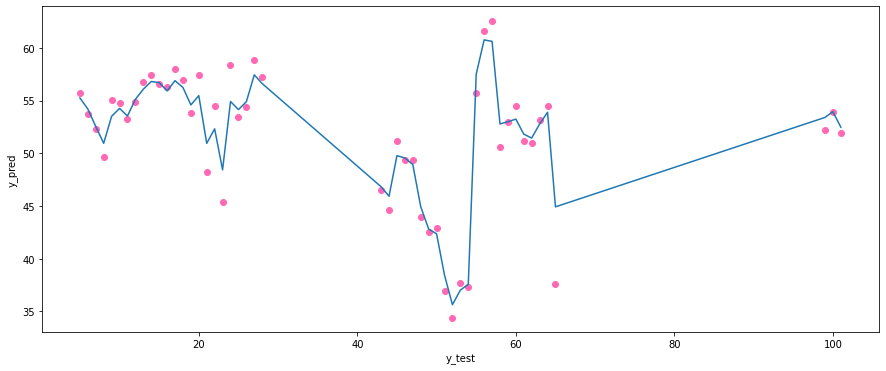

In [20]:
print(rndforest.score(X, Y)*100)
y_pred = rndforest.predict(X)
xaxis = Y
yaxis = y_pred
plt.xlabel("y_test")
plt.ylabel("y_pred")
df4 = df2[:50]
plt.scatter(df4.index, df4['WQI'], color='hotpink')
plt.plot(df4.index, y_pred[:50])
plt.show()

In [21]:
cross_val_score(rndforest, X, Y)

array([ 0.00677932, -0.15582206, -0.17546682, -0.05218187, -0.54668642])

74.28359561997124
[55.71959142 55.53258547 55.34557953 ... 43.14436193 42.95735599
 42.77035004]


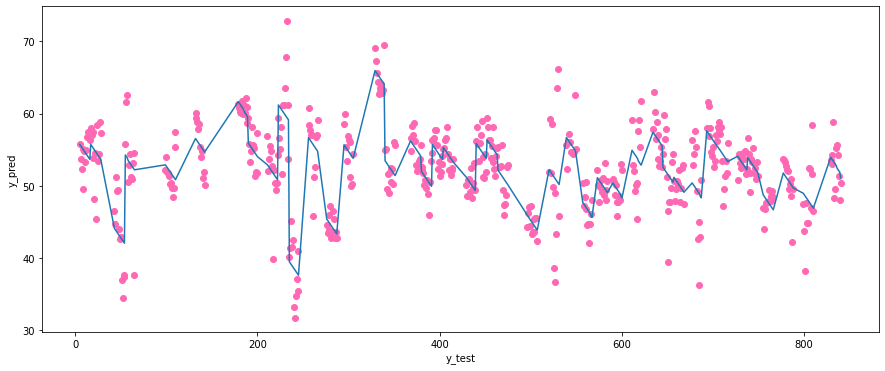

In [22]:

lasso = Lasso(alpha = 0.0001, max_iter = 1000, tol=0.001)
lasso.fit(X, Y)
print(lasso.score(X, Y)*100)
y_pred = lasso.predict(X)
xaxis = Y
yaxis = y_pred
plt.xlabel("y_test")
plt.ylabel("y_pred")
df4 = df2[:500]
plt.scatter(df4.index, df4['WQI'], color='hotpink')
plt.plot(df4.index, y_pred[:500])
# plt.plot(df2[df2['GANGA'] == 1].index,df2[df2['GANGA'] == 1]['WQI'])
# plt.plot(df2[df2['GANGA'] == 1].index,y_pred)
# plt.show()
# testpred = pd.DataFrame(columns = ['TEST', 'PRED'])
# testpred['TEST'] = df2[df2['GANGA'] == 1]['WQI']
# testpred['PRED'] = y_pred
print(y_pred)

74.28902850508811


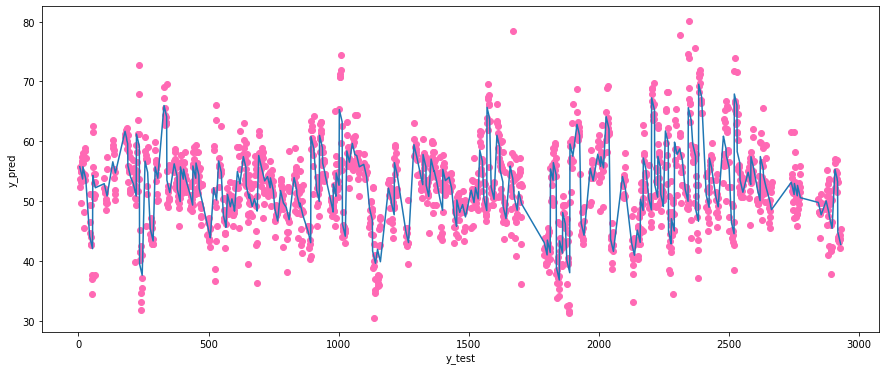

In [23]:

ridge = Ridge(alpha = 0.0001, max_iter = 1000, tol=0.001)
ridge.fit(X, Y)
print(ridge.score(X, Y)*100)
y_pred = ridge.predict(X)
xaxis = Y
yaxis = y_pred
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(df2.index, df2['WQI'], color='hotpink')
plt.plot(df2.index, y_pred)
plt.show()
# testpred = pd.DataFrame(columns = ['TEST', 'PRED'])
# testpred['TEST'] = df2[df2['GANGA'] == 1]['WQI']
# testpred['PRED'] = y_pred
# print(y_pred)

In [24]:

elastic = ElasticNet()
elastic.fit(X, Y)
print(elastic.score(X, Y)*100)
y_pred = elastic.predict(X[X.index == 832])
# xaxis = y_test
# yaxis = y_pred
# plt.xlabel("y_test")
# plt.ylabel("y_pred")
# plt.plot(df2[df2['GANGA'] == 1].index,df2[df2['GANGA'] == 1]['WQI'])
# plt.plot(df2[df2['GANGA'] == 1].index,y_pred)
# plt.show()
# testpred = pd.DataFrame(columns = ['TEST', 'PRED'])
# testpred['TEST'] = df2[df2['GANGA'] == 1]['WQI']
# testpred['PRED'] = y_pred
print(y_pred)

0.9107516347326094
[52.64445482]


TRAIN TEST SPLIT on Individual Rivers

In [25]:
from sklearn.model_selection import train_test_split
river_list = dfwork['RIVER'].unique()
for river in river_list:
    lasso_model = Lasso(alpha = 0.0001, max_iter = 1000, tol=0.001)
    forest_model = RandomForestRegressor(n_jobs=-1)
    ridge_model = Ridge(alpha = 0.0001, max_iter = 1000, tol=0.001)

    curr_df = dfwork[dfwork['RIVER'] == river].drop(['RIVER'], axis=1)
    Xdata = curr_df[['YEAR']]
    Ydata = curr_df[['WQI']]
    X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, train_size=0.8)
    lasso_model.fit(X_train, y_train)
    lscore = lasso_model.score(X_test, y_test)
    svr_model.fit(X_train, y_train)
    svrscore = svr_model.score(X_test, y_test)
    forest_model.fit(X_train, y_train)
    forest_score = forest_model.score(X_test, y_test)
    ridge_model.fit(X_train, y_train)
    ridge_score = ridge_model.score(X_test, y_test)
    # rest_model.fit(X_train, y_train)
    # forestscore = forest_model.score(X_test, y_test)
    print(f"{river}\nLASSO: {lscore}\nSVR: {svrscore}\nRandom Forest: {forest_score}\nRidge: {ridge_score}\n")
    # score = lasso_model.score(Xtrn, Ytrn)
    # plt.plot(Xtrn,Ytrn)
    # plt.plot(Xtrn,lasso_model.predict(Xtrn), color='purple')
    # print(river, score)

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


ALKANANDA
LASSO: 0.25365451288602725
SVR: 0.2863223053297437
Random Forest: 0.48747395863574705
Ridge: 0.25366315740310263



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


AMRAVATI
LASSO: -25.968038636457393
SVR: -19.971874300414612
Random Forest: -18.03887209266115
Ridge: -25.96812054546723



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


ARKAVATHI
LASSO: 0.3133353896630151
SVR: -0.2932162061768975
Random Forest: 0.7438207823666012
Ridge: 0.31332482021153807



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


ARPA
LASSO: 0.8134228678418606
SVR: 0.28202891109034556
Random Forest: 0.6440462090741383
Ridge: 0.8134261455122882



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BAITARNI
LASSO: -161.442660189035
SVR: -275.36328320549393
Random Forest: -16.49944579875445
Ridge: -161.44425587472222



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BARAK
LASSO: 0.6076546044063796
SVR: 0.6703628020091363
Random Forest: 0.5901679619657354
Ridge: 0.6076588710977432



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BEAS
LASSO: 0.12268197511682
SVR: -1.133089680905408
Random Forest: -0.025043642365090824
Ridge: 0.1226738038934746



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BEKI
LASSO: -0.3874678615201439
SVR: -1.0294755123391326
Random Forest: -0.05942761877448488
Ridge: -0.3874747416072333



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BHADRA
LASSO: 0.3663177311398238
SVR: 0.1840798716292551
Random Forest: -0.07369124861331766
Ridge: 0.3663165235686673



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BHAGIRATHI
LASSO: -1.246341054315793
SVR: -1.2596882279551989
Random Forest: 0.6396802653444897
Ridge: -1.2463412253161552



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BHARALU
LASSO: -36.08031739192543
SVR: -18.904736863042093
Random Forest: -14.513718483626551
Ridge: -36.08078047474192



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BHAVANI
LASSO: -0.715713645028736
SVR: -1.2793767007388612
Random Forest: 0.579299969858513
Ridge: -0.7157030980596772



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BHIMA
LASSO: 0.060703568502699534
SVR: -0.4548740023689133
Random Forest: 0.5725759047230106
Ridge: 0.060759660156954554



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BHOGDOI
LASSO: 0.012972994278946826
SVR: -2.5646143636610126
Random Forest: -0.48427193398979584
Ridge: 0.012959014676483527



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BINWA
LASSO: -0.6937179047501316
SVR: 0.024007690758564126
Random Forest: -0.5119365492830725
Ridge: -0.6936847770124326



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BIRUPA
LASSO: -0.563674805250223
SVR: -0.6283870120562647
Random Forest: 0.5285532956982151
Ridge: -0.5636851106750693



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BRAHAMPUTRA
LASSO: 0.18956193530137255
SVR: 0.2398930725196593
Random Forest: 0.6911054351177269
Ridge: 0.1895671776878487



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BRAHMANI
LASSO: -0.5566137094002435
SVR: -2.204874273830867
Random Forest: -0.019434598944558124
Ridge: -0.5566457305779244



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BRAHMAPUTRA
LASSO: -2.7726896298964046
SVR: -4.1366903236108525
Random Forest: -0.3018523253643173
Ridge: -2.772649830442874



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BRAHMPUTRA
LASSO: 0.41918827284249394
SVR: 0.37013912546015426
Random Forest: 0.5049195601949297
Ridge: 0.41919787565635713



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BURHI GANDAK
LASSO: 0.03172092384228098
SVR: 0.007083062722388012
Random Forest: -0.41127246372535975
Ridge: 0.031720073146850325



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BURHIDIHING
LASSO: -0.1630148183514799
SVR: -0.40630951447606134
Random Forest: -0.06759991461186021
Ridge: -0.1629972438509555



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


BURIDIHING
LASSO: -0.14287255540411214
SVR: -1.5694360266479541
Random Forest: 0.07400904737300174
Ridge: -0.14288382134761912



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


CAUVERY
LASSO: -0.11539356608109208
SVR: -0.44354128132869186
Random Forest: 0.3839967160841159
Ridge: -0.11540447535323217



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


CHANDRABHAGA
LASSO: -1134.826113936663
SVR: -1273.9881575113216
Random Forest: -976.9318585526217
Ridge: -1134.868517675149



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


CHATHE
LASSO: -0.7197707092982912
SVR: 0.30379237622945665
Random Forest: -1.88057841969029
Ridge: -0.7197819477979506



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


CHILLAR
LASSO: -1.4682909623201725
SVR: -1.5613977007637407
Random Forest: -1.579769147883681
Ridge: -1.4682783007504692



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


CHURNI
LASSO: -0.42226786468569455
SVR: -1.7397456150933395
Random Forest: -0.25151689114187703
Ridge: -0.42227209092727547



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DAHA
LASSO: -6.475437722134954
SVR: -5.879589025619172
Random Forest: -8.11334736073126
Ridge: -6.475825581403776



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DAMODAR
LASSO: -0.7231322940513392
SVR: -1.0943323872484219
Random Forest: 0.1989435584265904
Ridge: -0.7231402269222089



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DENWA
LASSO: 0.16906987889428238
SVR: 0.2466341757160111
Random Forest: -1.2104912629526474
Ridge: 0.1690789185409518



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DHALESHWARI
LASSO: -8.83918203566471
SVR: -7.742745954222228
Random Forest: -9.699996258619226
Ridge: -8.839407188626737



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DHANSIRI
LASSO: -3.4022082654082455
SVR: -5.281632833663651
Random Forest: 0.27227423321720146
Ridge: -3.4022771212134915



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DHAUS
LASSO: -1.0224057966437652
SVR: -3.5998746538095423
Random Forest: -3.2343447509456853
Ridge: -1.0224414909527186



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DIGBOI
LASSO: 0.756672942948452
SVR: 0.35835524894504234
Random Forest: 0.471574679367154
Ridge: 0.756673148814318



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DIKHOW
LASSO: -0.15460381008443913
SVR: 0.018062547020551212
Random Forest: 0.10693107211439812
Ridge: -0.15458385451156031



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


DISANG
LASSO: 0.7937981976112378
SVR: 0.5825752967043514
Random Forest: 0.6446282470104107
Ridge: 0.7937998175867296



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


FARMAR
LASSO: -0.3313361117460405
SVR: -0.3669269109275155
Random Forest: -3.068251980577381
Ridge: -0.33138411378533905



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GANDAK
LASSO: -6.831669554103935
SVR: -8.594542884879523
Random Forest: -7.497937927992048
Ridge: -6.831841171466203



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GANGA
LASSO: -1.2616775558538307
SVR: -0.8511898200948851
Random Forest: -0.5659693259973266
Ridge: -1.261635680005495



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GHAGHARA
LASSO: 0.2984887677217287
SVR: 0.14690421473223547
Random Forest: 0.3013762913299939
Ridge: 0.2984959151645936



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GHATPRABHA
LASSO: -2.704666418961832
SVR: -1.7306365295229629
Random Forest: -5.267728538857747
Ridge: -2.704700188675172



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GIRNA
LASSO: -0.45928109440153175
SVR: -2.5463140089551963
Random Forest: -1.056672583742404
Ridge: -0.4593754251023028



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GODAVARI
LASSO: -3.225589037540005
SVR: -7.402769654501798
Random Forest: -5.470940819921881
Ridge: -3.2256929931177973



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GODAVARI,
LASSO: -0.6537019027361699
SVR: -0.663973998818016
Random Forest: -0.5778367285282553
Ridge: -0.6537077900257957



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GOMTI
LASSO: -0.10801466532143067
SVR: -0.4415161070239959
Random Forest: -1.1535374261567521
Ridge: -0.10801800991484867



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


GOUR
LASSO: -1.0942987974748952
SVR: -13.755316245406084
Random Forest: -72.41572415920999
Ridge: -1.0944142504803929



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


HARBORA
LASSO: -0.30676055033284033
SVR: -0.3542073713856351
Random Forest: -4.886516168766797
Ridge: -0.3067747748022245



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


HASDEO
LASSO: -4.546476149673315
SVR: -6.154673926717083
Random Forest: -2.517161256514221
Ridge: -4.546419256703767



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


HEMAVATI
LASSO: -1.5012379739007926
SVR: -1.4031171115006686
Random Forest: -1.9010359265989574
Ridge: -1.5012642203542375



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


HOOGHLY
LASSO: -1.4577389764780109
SVR: -2.1164397293253674
Random Forest: -2.9475771796683152
Ridge: -1.4577909769245987



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


HUNDRI
LASSO: 0.7051316608289057
SVR: 0.35277003632752646
Random Forest: -0.3021560607060143
Ridge: 0.7051406887819487



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


IB
LASSO: -0.01842819017100239
SVR: -0.3133044893703951
Random Forest: -0.07930089102123783
Ridge: -0.018431761070611508



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


INDRAVATI
LASSO: -36.35791633573107
SVR: -45.62494685261905
Random Forest: -20.164057723966707
Ridge: -36.357838604910455



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


INDRAYANI
LASSO: -0.03471080177692687
SVR: -0.02817957829691453
Random Forest: 0.01415779236096637
Ridge: -0.03471396894574452



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


JAI BHARALI
LASSO: 0.37754521887393633
SVR: 0.1674873230275652
Random Forest: 0.5892719238211745
Ridge: 0.37755382063195775



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


JAMMER
LASSO: -55.93461916560288
SVR: -66.73705955216214
Random Forest: -72.3389318923314
Ridge: -55.93492532000313



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


JHANJI
LASSO: 0.26542447125974045
SVR: 0.23086078226671325
Random Forest: 0.24291299509843178
Ridge: 0.26542992825776546



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KABINI
LASSO: -0.14969930924005248
SVR: -0.7156569918743618
Random Forest: -3.1662489696435614
Ridge: -0.14974196451929833



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KAGINA
LASSO: 0.22257620716150905
SVR: -0.0004066073747803767
Random Forest: -7.762052816602434
Ridge: 0.22265190031979998



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KALI
LASSO: -3.1413611123807454
SVR: -2.944768997858931
Random Forest: -3.347518991509136
Ridge: -3.1413578242128333



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KALINADI
LASSO: -0.4735813785894729
SVR: -0.49557201657463534
Random Forest: -1.6590937814590614
Ridge: -0.47358450973683586



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KAMALA
LASSO: -2.553218511702944
SVR: 0.19582136632297298
Random Forest: -7.785870395565825
Ridge: -2.553203034335291



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KANHAN
LASSO: -0.7861275291320249
SVR: -0.10978133358883269
Random Forest: 0.09207306785212788
Ridge: -0.7861575371909926



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KAPILI
LASSO: -0.25063495745225595
SVR: -0.6136141515115878
Random Forest: 0.37118095838199117
Ridge: -0.25062506740840806



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KATHAJODI
LASSO: -1.2062620927085015
SVR: -0.590113682304171
Random Forest: -1.041617520186508
Ridge: -1.2062929354998078



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KELO
LASSO: -1.1291886528883293
SVR: -1.0856462315739939
Random Forest: -3.461104144807348
Ridge: -1.1291840416574725



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KHARASROTA
LASSO: 0.027474914752682045
SVR: -0.8374663628980039
Random Forest: 0.9338364001196402
Ridge: 0.02749076601392042



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KHAROON
LASSO: 0.3397929618358869
SVR: 0.16026618310574148
Random Forest: 0.0777774301615799
Ridge: 0.33980767931818323



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KHARSROTA
LASSO: -1.9717048008826823
SVR: -0.6616842931902887
Random Forest: -0.44858878900053645
Ridge: -1.971466345729561



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KINNERASANI
LASSO: -0.02479942329016116
SVR: -0.10649554675706852
Random Forest: -0.41589863230865554
Ridge: -0.024795093154219128



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KOEL
LASSO: -0.6078646061197943
SVR: -2.055114317529831
Random Forest: -4.186719777209793
Ridge: -0.6078766706541274



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KOLAR
LASSO: -0.7552782892270549
SVR: -2.0545589259998636
Random Forest: -2.237283550617773
Ridge: -0.755286221678541



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KOLONG
LASSO: 0.5209127309369721
SVR: 0.3957861080761669
Random Forest: 0.4536524922304014
Ridge: 0.5209173191256882



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KOSHI
LASSO: 0.032784188631516664
SVR: -0.12101606935783304
Random Forest: 0.35544309998796675
Ridge: 0.03275427682128784



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KOYNA
LASSO: -0.36856478830332007
SVR: -0.0831136638844423
Random Forest: -0.1733756158805404
Ridge: -0.36854803838183114



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KRISHNA
LASSO: -0.512014629648005
SVR: -1.5106980563621835
Random Forest: -4.508382866594869
Ridge: -0.511982108634113



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KUAKHAI
LASSO: -0.1744158319770055
SVR: -0.41277968751105787
Random Forest: 0.02139997587632836
Ridge: -0.17442208814047322



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KUNDU
LASSO: -0.9181940959235886
SVR: -7.035492753568754
Random Forest: -0.3389220959930259
Ridge: -0.9182516725547558



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KUSEI
LASSO: -6.2415596454385005
SVR: -5.847396423514039
Random Forest: -4.907390012576071
Ridge: -6.2416239740701025



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


KUSHIARA
LASSO: 0.6358215965785807
SVR: 0.6509596249269696
Random Forest: 0.6933624377878924
Ridge: 0.635828971702968



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


LAKSHMANTIRTHA
LASSO: -4.214018957472969
SVR: -6.103920343420624
Random Forest: -3.585129654027928
Ridge: -4.213896983951797



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


LARGI
LASSO: -1.77505233808491
SVR: -1.8321084308481783
Random Forest: 0.28705922708903664
Ridge: -1.7750747118493826



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MAHANADI
LASSO: -0.8939132373838545
SVR: -8.568732725332069
Random Forest: -4.308097926267495
Ridge: -0.8940174962322514



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MAHI
LASSO: 0.4249190375961732
SVR: 0.48145282443761617
Random Forest: 0.4182338494740502
Ridge: 0.4249206560611284



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MALEI
LASSO: -37.712292410974875
SVR: -60.147737956399105
Random Forest: -67.03212005453793
Ridge: -37.71308401769035



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MALPRABHA
LASSO: -1.162716434261212
SVR: -1.5653675599053072
Random Forest: -1.042080119793627
Ridge: -1.1627020700986832



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MANDAKINI
LASSO: -2.5501865385434215
SVR: -0.961412800718499
Random Forest: -0.6651883175521418
Ridge: -2.5501949576958625



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MANER
LASSO: 0.06284592414221524
SVR: -0.0043709508193237046
Random Forest: -0.2718917641452767
Ridge: 0.0628535349048337



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MANJEERA
LASSO: -3.404287052282916
SVR: -2.9480235160769332
Random Forest: -1.621694051892431
Ridge: -3.4043031898747174



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MULA
LASSO: -11.74947742967767
SVR: -9.56715393302572
Random Forest: -7.7674737412179695
Ridge: -11.749844047789201



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MULAMUTHA
LASSO: 0.04260653977759665
SVR: -0.06519208249844777
Random Forest: 0.6149645765993323
Ridge: 0.042612908786680115



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MUNDALI(WATER
LASSO: 0.10391669070000609
SVR: 0.15766955299147678
Random Forest: 0.2815043216846671
Ridge: 0.10392928224771658



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MUNERU
LASSO: -0.04650790605337707
SVR: -0.19630788739464244
Random Forest: -1.2686018856657273
Ridge: -0.04650037601920043



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MUSI
LASSO: -18.39081462265586
SVR: -4.3607096211409235
Random Forest: -3.5358976639036817
Ridge: -18.39128539254409



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


MUTHA
LASSO: -0.10994945712746418
SVR: -0.025508917494064587
Random Forest: -0.0074592504739985355
Ridge: -0.10996642399142087



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


NABADWIP
LASSO: 0.7649666853717287
SVR: 0.5792615285722145
Random Forest: 0.5335007510949852
Ridge: 0.7649582269459945



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


NAKKAVAGY
LASSO: -2.3289865839251362
SVR: -7.715186363209806
Random Forest: -0.645203902819663
Ridge: -2.3290040728284445



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


NARMADA
LASSO: -2.086862174199119
SVR: -3.879550042108809
Random Forest: -3.9166056879699775
Ridge: -2.0868877557861225



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


NEUGAL
LASSO: -2.539183708080048
SVR: 0.03440569343846667
Random Forest: -0.6333480468221928
Ridge: -2.539247056060103



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


NIRA
LASSO: -0.6012989805299624
SVR: -0.1985560811867293
Random Forest: 0.4198960957439287
Ridge: -0.6013068301560511



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PALLERU
LASSO: -186.07207968168595
SVR: -93.65805609543159
Random Forest: -29.60512066189531
Ridge: -186.07791849869125



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PANCHAGANGA
LASSO: -0.08354234817449013
SVR: -0.49029087641579583
Random Forest: -0.6426680073621915
Ridge: -0.0835078585155069



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PANCHNAI
LASSO: -4.321396809305928
SVR: -19.646561551600854
Random Forest: -158.47898994932643
Ridge: -4.321279196083187



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PARVATI
LASSO: -14.074373572158125
SVR: -3.824497138527274
Random Forest: -3.62098117230238
Ridge: -14.074737931647007



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PAWANA
LASSO: -2.4558541471485777
SVR: -1.5476251307791133
Random Forest: -6.554758251662543
Ridge: -2.455856033836236



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PENNAR
LASSO: -3.5534395877453413
SVR: -4.276693598891832
Random Forest: -4.938190704602196
Ridge: -3.5535781070814627



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


PURNA
LASSO: -1.6986470543577257
SVR: -1.9286089873507621
Random Forest: -0.8869730672959424
Ridge: -1.6986510073168866



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RAMGANGA
LASSO: -0.702728318382017
SVR: -1.633748944206077
Random Forest: -0.24956926767481158
Ridge: -0.7027271245328572



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RAMREKHA
LASSO: -3.9541775968435084
SVR: -1.6826101777666564
Random Forest: -0.9199618780943399
Ridge: -3.9542212972259057



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RANGA
LASSO: 0.764038042764278
SVR: 0.6175381642802267
Random Forest: 0.7227659927836846
Ridge: 0.7640451174485552



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RAPTI
LASSO: -2.3894989165484173
SVR: -1.293351531519558
Random Forest: -4.658776635324983
Ridge: -2.3895335283122967



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RAVI
LASSO: -0.12458706988091794
SVR: -0.1049468484627345
Random Forest: 0.6032976841307053
Ridge: -0.12458723148005824



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RIHAND
LASSO: -0.46194925095351724
SVR: -0.08678437296878228
Random Forest: -1.8796440495207838
Ridge: -0.46194700124129184



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RIVER
LASSO: 0.559081393917989
SVR: 0.6329837971602239
Random Forest: 0.36569888003991413
Ridge: 0.559085370881468



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RUPNARAYAN
LASSO: -3.7818618757860145
SVR: -0.566288102800794
Random Forest: -3.3518040007107572
Ridge: -3.7819537790501174



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SABARI
LASSO: -0.47031355891371485
SVR: -2.9109157237146084
Random Forest: -0.47239932720788524
Ridge: -0.47031367135577473



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SABARMATI
LASSO: -3.7939496411618148
SVR: -2.9853219591705495
Random Forest: -5.894344453947217
Ridge: -3.793980519734758



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SAI
LASSO: -0.7477188955526761
SVR: -1.072327000860207
Random Forest: -6.3199871315761404
Ridge: -0.7477212957196882



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SANKH
LASSO: -0.7537027272154515
SVR: -0.9669773932761887
Random Forest: -0.4781947935763702
Ridge: -0.7537025520676337



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SANKOSH
LASSO: -13.862504377556835
SVR: -3.7992132321941945
Random Forest: -16.443210359526386
Ridge: -13.86262699133311



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SARYU
LASSO: 0.8844222133968108
SVR: 0.7729813303821358
Random Forest: 0.9128774163444736
Ridge: 0.8844345322515454



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SATLUJ
LASSO: 0.9294970637428498
SVR: 0.8910701115194325
Random Forest: 0.7067461464847361
Ridge: 0.9294975265983868



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SEONATH
LASSO: -1.168350836268068
SVR: -0.3341114992248644
Random Forest: -0.9729108878902641
Ridge: -1.1683482814181594



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SERUA
LASSO: -2.2977160788142186
SVR: -2.5629967315706823
Random Forest: -1.8956728892745387
Ridge: -2.2977472469402924



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SHANKNI
LASSO: -8.51465107129197
SVR: -9.996264855570981
Random Forest: -5.066004320937363
Ridge: -8.514626819712356



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SHIMSHA
LASSO: -5.680597300013179
SVR: -4.500532576546654
Random Forest: -5.932211022392931
Ridge: -5.680686664687148



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SHIVNA
LASSO: -0.05657330990083076
SVR: 0.13869818790032473
Random Forest: -0.904170704356452
Ridge: -0.05659189698658218



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SIKRANA
LASSO: -0.6918595218993868
SVR: -0.612642533227338
Random Forest: -0.7662204482792427
Ridge: -0.6918348492779347



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SINDH
LASSO: -5.654635546274329
SVR: -5.849640506336894
Random Forest: -5.134842599156165
Ridge: -5.654587018250088



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SIRSA
LASSO: 0.6208791038123009
SVR: 0.08682775598260506
Random Forest: 0.20626140608195487
Ridge: 0.620882435005808



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SIRSIYA
LASSO: 0.31974592167190563
SVR: 0.3527864895125541
Random Forest: -0.5612625355087855
Ridge: 0.31974865423226995



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SIUEL
LASSO: -0.7837985364791589
SVR: -0.19038764451655088
Random Forest: -0.46204666098640446
Ridge: -0.7838300974260899



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SONAI
LASSO: 0.8357713486013458
SVR: 0.7528864792660814
Random Forest: 0.08650851274317906
Ridge: 0.835776223850378



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SONE
LASSO: -0.05245802059108051
SVR: -1.3287218037957143
Random Forest: -2.151329952432242
Ridge: -0.05249325248153647



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SUBARNAREKHA
LASSO: -0.00410427898861454
SVR: 0.017298535103570822
Random Forest: -3.742308229190047
Ridge: -0.004098086089360908



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SUKETI KHAD
LASSO: -12.363207257168987
SVR: -7.568572753684771
Random Forest: -9.658347409255265
Ridge: -12.363477900388885



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SUTLEJ
LASSO: -10.367381826753379
SVR: -14.115121817774318
Random Forest: -4.055848043955827
Ridge: -10.367524910076977



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


SWAN
LASSO: -0.18781830082352946
SVR: -0.07044823895244279
Random Forest: 0.31182429658120425
Ridge: -0.18782042238742735



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


TALCHER
LASSO: 0.06494650096442967
SVR: -0.15375793461339704
Random Forest: 0.4595989140645129
Ridge: 0.06493931224361782



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


TAPI
LASSO: 0.507444865008716
SVR: 0.4924058524902176
Random Forest: 0.5890219045484173
Ridge: 0.5074171677471926



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


TUNGABHADRA
LASSO: 0.35689341651907724
SVR: 0.40523561091424687
Random Forest: 0.11043860176941456
Ridge: 0.35688521827033837



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


TUNGHA
LASSO: 0.3558551807438418
SVR: 0.1938657342427237
Random Forest: 0.4979845531203976
Ridge: 0.3558556754883099



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


TUNGHABHADRA
LASSO: 0.015510450616127325
SVR: -0.22797173046316366
Random Forest: -0.44943083965786323
Ridge: 0.015547623443602276



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


VENNA
LASSO: -0.3828070117962057
SVR: -0.0384022701110982
Random Forest: 0.29206037578494437
Ridge: -0.3828685351236156



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


WAINGANGA
LASSO: -0.19773660329845955
SVR: -0.6006312546325927
Random Forest: 0.12318016817668076
Ridge: -0.19771756765212922



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


WARDHA
LASSO: -0.6804644371449451
SVR: 0.38472324253836754
Random Forest: 0.10663099460803438
Ridge: -0.6804343338820877



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


YAGACHI
LASSO: 0.34632734120212116
SVR: 0.4545087675180315
Random Forest: -0.7468059434358532
Ridge: 0.34634448333808987



c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/141380350.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


YAMUNA
LASSO: -11.029308752576485
SVR: -44.64980001144209
Random Forest: -30.045727999990497
Ridge: -11.034497928257458



*TRAINING ON INDIVIDUAL RIVERS AND PREDICTING VALUES* (overfit)

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_17180/4020676916.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(Xtrn,Ytrn)
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


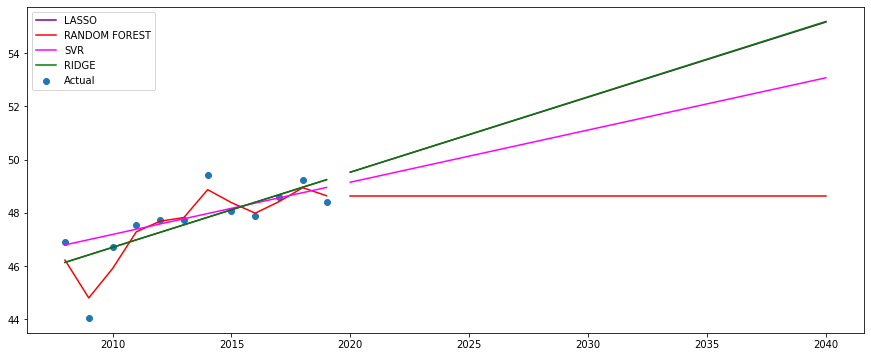

In [26]:
river_list = dfwork['RIVER'].unique()

"""for river in river_list[1:2]:
    lasso_model = Lasso(alpha = 0.0001, max_iter = 1000, tol=0.001)
    curr_df = dfwork[dfwork['RIVER'] == river].drop(['RIVER'], axis=1)
    Xtrn = curr_df[['YEAR']]
    Ytrn = curr_df[['WQI']]
    lasso_model.fit(Xtrn,Ytrn)
    score = lasso_model.score(Xtrn, Ytrn)
    plt.plot(Xtrn,Ytrn)
    plt.plot(Xtrn,lasso_model.predict(Xtrn), color='purple')
    print(river, score)"""

lasso_model = Lasso(alpha = 0.01, max_iter = 1000, tol=0.001)
forest_model = RandomForestRegressor(n_jobs=-1)
svr_model = SVR(kernel='linear', gamma = 'auto')
ridge_model = Ridge(alpha = 0.0001, max_iter = 1000, tol=0.001)

curr_df = dfwork[dfwork['RIVER'] == 'GANGA'].drop(['RIVER'], axis=1)

Xtrn = curr_df[['YEAR']]
Ytrn = curr_df[['WQI']]

years = pd.DataFrame({"YEAR": [i for i in range (2020,2041)]})

lasso_model.fit(Xtrn,Ytrn)
forest_model.fit(Xtrn,Ytrn)
svr_model.fit(Xtrn,Ytrn)
ridge_model.fit(Xtrn, Ytrn)
score = lasso_model.score(Xtrn, Ytrn)

# joblib.dump(lasso_model, 'river_models/Ganga.pkl')

plt.scatter(Xtrn,Ytrn, label='Actual')
plt.plot(Xtrn,lasso_model.predict(Xtrn), color='purple', label='LASSO')
plt.plot(years,lasso_model.predict(years), color='purple')
plt.plot(Xtrn,forest_model.predict(Xtrn), color='red', label='RANDOM FOREST')
plt.plot(years,forest_model.predict(years), color='red')
plt.plot(Xtrn,svr_model.predict(Xtrn), color='magenta', label='SVR')
plt.plot(years,svr_model.predict(years), color='magenta')
plt.plot(Xtrn,ridge_model.predict(Xtrn), color='green', label='RIDGE')
plt.plot(years,ridge_model.predict(years), color='green')

plt.legend()

Predicting values for 2020-2040 on the globally trained model

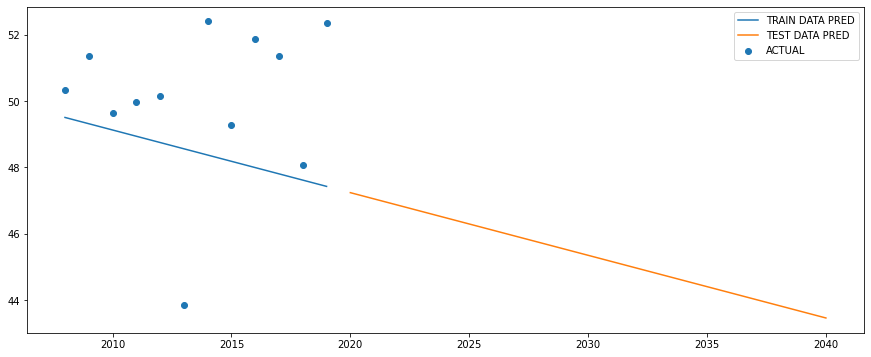

In [27]:
newadf = X.copy()
newadf.shape
template = pd.DataFrame([[0]*newadf.shape[1]]*21,columns=newadf.columns)
template2 = pd.DataFrame([[0]*newadf.shape[1]]*12,columns=newadf.columns)

bruh_test = template.copy()
bruh_test2 = template2.copy()

arr = pd.DataFrame({"YEAR": [i for i in range (2020,2041)]})
arr2 = pd.DataFrame({"YEAR": [i for i in range (2008,2020)]})

bruh_test['YEAR'] = arr['YEAR']
bruh_test2['YEAR'] = arr2['YEAR']

curr_df = dfwork[dfwork['RIVER'] == 'GODAVARI'].drop(['RIVER'], axis=1)
Xtrn = curr_df[['YEAR']]
Ytrn = curr_df[['WQI']]

bruh_test['GODAVARI']=1
bruh_test2['GODAVARI']=1

y_pred = []
# print(bruh_test2)
# print(.predict(bruh_test))
y_pred = lasso.predict(bruh_test)

plt.scatter(Xtrn,Ytrn, label='ACTUAL')
plt.plot(Xtrn,lasso.predict(bruh_test2), label='TRAIN DATA PRED')
plt.plot(bruh_test['YEAR'], y_pred, label='TEST DATA PRED')

plt.legend()

In [28]:

river_list = dfwork['RIVER'].unique() 
for i in river_list:
    lasso_model = Lasso(alpha = 0.01, max_iter = 1000, tol=0.001)
    curr_df = dfwork[dfwork['RIVER'] == i].drop(['RIVER'], axis=1)
    Xtrn = curr_df[['YEAR']]
    Ytrn = curr_df[['WQI']]
    lasso_model.fit(Xtrn,Ytrn)
    joblib.dump(lasso_model, i+'.pkl')

In [29]:
gangaload = joblib.load('river_models/GANGA.pkl')
years = pd.DataFrame({"YEAR": [i for i in range (2020,2041)]})
gangaload.predict(years)

array([49.52380355, 49.80575918, 50.08771481, 50.36967044, 50.65162608,
       50.93358171, 51.21553734, 51.49749297, 51.7794486 , 52.06140423,
       52.34335986, 52.62531549, 52.90727112, 53.18922675, 53.47118238,
       53.75313801, 54.03509364, 54.31704927, 54.5990049 , 54.88096053,
       55.16291616])

In [30]:
river_list

array(['ALKANANDA', 'AMRAVATI', 'ARKAVATHI', 'ARPA', 'BAITARNI', 'BARAK',
       'BEAS', 'BEKI', 'BHADRA', 'BHAGIRATHI', 'BHARALU', 'BHAVANI',
       'BHIMA', 'BHOGDOI', 'BINWA', 'BIRUPA', 'BRAHAMPUTRA', 'BRAHMANI',
       'BRAHMAPUTRA', 'BRAHMPUTRA', 'BURHI GANDAK', 'BURHIDIHING',
       'BURIDIHING', 'CAUVERY', 'CHANDRABHAGA', 'CHATHE', 'CHILLAR',
       'CHURNI', 'DAHA', 'DAMODAR', 'DENWA', 'DHALESHWARI', 'DHANSIRI',
       'DHAUS', 'DIGBOI', 'DIKHOW', 'DISANG', 'FARMAR', 'GANDAK', 'GANGA',
       'GHAGHARA', 'GHATPRABHA', 'GIRNA', 'GODAVARI', 'GODAVARI,',
       'GOMTI', 'GOUR', 'HARBORA', 'HASDEO', 'HEMAVATI', 'HOOGHLY',
       'HUNDRI', 'IB', 'INDRAVATI', 'INDRAYANI', 'JAI BHARALI', 'JAMMER',
       'JHANJI', 'KABINI', 'KAGINA', 'KALI', 'KALINADI', 'KAMALA',
       'KANHAN', 'KAPILI', 'KATHAJODI', 'KELO', 'KHARASROTA', 'KHAROON',
       'KHARSROTA', 'KINNERASANI', 'KOEL', 'KOLAR', 'KOLONG', 'KOSHI',
       'KOYNA', 'KRISHNA', 'KUAKHAI', 'KUNDU', 'KUSEI', 'KUSHIARA',
       'LAKSH

In [31]:
rivers = pd.DataFrame(river_list, columns=['RIVER'])
rivers

,RIVER
0,ALKANANDA
1,AMRAVATI
2,ARKAVATHI
3,ARPA
4,BAITARNI
...,...
144,VENNA
145,WAINGANGA
146,WARDHA
147,YAGACHI


In [32]:
json_river = rivers.to_json()
jsonfile = open("rivers.json", 'w')
jsonfile.write(json_river)
jsonfile.close()

In [33]:
dfstate = pd.read_excel("wqilimitstate.xlsx")
dfstate

,STATE,YEAR,TEMPERATURE,DISSOLVED OXYGEN,PH,CONDUCTIVITY,BOD,NITRATE,TOTAL COLIFORM,WQI,Qtemp,Qdo,Qbod,Qph,Qn,Qtc
0,ANDHRA PRADESH,2008,26.142168,6.404194,7.841935,664.274194,2.842903,1.936774,1715.677419,52.111791,12.741935,8.0,70.161290,80.838710,86.709677,22.935484
1,ANDHRA PRADESH,2009,26.809477,6.290323,7.712903,672.970323,3.024194,1.852581,3618.290323,52.858176,11.870968,8.0,66.645161,85.838710,87.903226,24.419355
2,ANDHRA PRADESH,2010,26.378424,6.865217,7.621739,695.869565,2.234783,1.583913,1391.956522,53.517241,12.391304,8.0,72.391304,90.130435,88.347826,19.304348
3,ANDHRA PRADESH,2011,25.785174,6.276596,7.819149,616.723404,2.997021,2.018511,1073.638298,52.565664,12.957447,8.0,71.170213,82.659574,88.702128,21.255319
4,ANDHRA PRADESH,2012,25.892295,5.825490,7.800000,568.512353,4.348235,1.749608,923.392157,51.824206,12.921569,8.0,65.627451,83.156863,88.607843,22.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,WEST BENGAL,2015,26.719613,6.781667,7.915000,421.258667,5.341667,0.938333,61075.841667,44.494828,11.766667,8.0,56.133333,77.033333,93.100000,4.200000
296,WEST BENGAL,2016,26.514438,6.635000,7.736667,403.473667,5.331667,0.535000,56319.057333,46.162069,12.266667,8.0,54.700000,84.833333,95.533333,4.033333
297,WEST BENGAL,2017,25.715909,6.518182,7.663636,274.045455,3.381818,0.622727,56418.181818,47.512539,13.181818,8.0,59.909091,86.363636,95.090909,4.000000
298,WEST BENGAL,2018,24.800486,7.275758,7.607576,411.765455,4.206061,0.518788,41854.361818,47.843260,14.030303,8.0,58.242424,86.787879,95.393939,5.333333


In [34]:
state_list = dfstate['STATE'].unique()
state_list

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB',
       'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA',
       'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'], dtype=object)

In [35]:
states = pd.DataFrame(state_list, columns=['STATE'])
states

,STATE
0,ANDHRA PRADESH
1,ARUNACHAL PRADESH
2,ASSAM
3,BIHAR
4,CHHATTISGARH
5,DAMAN & DIU
6,DELHI
7,GOA
8,GUJARAT
9,HARYANA


In [36]:
json_state = states.to_json()
jsonfile = open("states.json", 'w')
jsonfile.write(json_state)
jsonfile.close()

In [37]:
dfx = dfstate[dfstate['STATE'] == 'MAHARASHTRA']
dfx

,STATE,YEAR,TEMPERATURE,DISSOLVED OXYGEN,PH,CONDUCTIVITY,BOD,NITRATE,TOTAL COLIFORM,WQI,Qtemp,Qdo,Qbod,Qph,Qn,Qtc
162,MAHARASHTRA,2008,24.703882,5.468488,7.668605,497.986047,8.165349,0.844375,6253.656047,50.735565,14.255814,7.906977,42.779070,83.279070,93.755814,29.744186
163,MAHARASHTRA,2009,25.522800,5.314943,7.801494,497.885057,8.100460,1.042371,6198.993333,50.362663,13.379310,7.816092,43.045977,82.563218,92.425287,30.080460
164,MAHARASHTRA,2010,24.847018,5.634516,7.861290,436.359548,7.447677,1.423161,520.677419,50.530145,14.187097,8.000000,43.870968,80.477419,89.800000,32.690323
165,MAHARASHTRA,2011,24.928595,5.544872,7.788462,498.600192,6.204359,1.395321,519.894231,52.030946,13.839744,8.000000,47.570513,83.724359,90.397436,33.198718
166,MAHARASHTRA,2012,25.028420,5.398590,7.841667,476.753141,6.502949,2.156410,531.378205,50.393015,14.025641,8.000000,46.102564,81.628205,84.365385,33.365385
167,MAHARASHTRA,2013,24.337528,5.457203,8.222458,507.745763,6.648305,3.607119,664.669492,46.089275,14.779661,8.000000,45.550847,69.016949,78.432203,30.050847
168,MAHARASHTRA,2014,24.675755,5.452941,8.002521,523.219916,6.647899,2.356303,636.672269,48.257172,14.201681,8.000000,44.873950,76.210084,85.411765,29.428571
169,MAHARASHTRA,2015,24.847934,5.462000,7.954500,641.999750,7.983500,2.532900,893.768333,45.869828,14.200000,8.000000,38.670000,77.420000,82.850000,25.810000
170,MAHARASHTRA,2016,25.218662,5.589068,7.699153,562.370932,7.522034,1.850424,419.444209,50.121420,13.771186,8.000000,43.533898,86.000000,85.822034,30.389831
171,MAHARASHTRA,2017,23.975264,5.361838,7.861028,617.903271,7.587664,1.517043,549.280374,49.269739,15.233645,8.000000,42.112150,80.841121,88.598131,29.177570


In [38]:
len(dfx[dfx['WQI'] <= 25]) + len(dfx[0 < dfx['WQI']]) 

12

In [39]:
len(dfx[dfx['WQI'] <= 50]) + len(dfx[25 < dfx['WQI']]) 

18

In [40]:
len(dfx[dfx['WQI'] <= 70]) + len(dfx[50 < dfx['WQI']]) 

18

In [41]:
len(dfx[dfx['WQI'] <= 90]) + len(dfx[70 < dfx['WQI']]) 

12

In [42]:
len(dfx[dfx['WQI'] <= 90]) + len(dfx[100 < dfx['WQI']]) 

12

In [43]:
from pmdarima import auto_arima
import datetime

In [44]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
river_list = dfwork['RIVER'].unique()
for river in river_list:
    curr_df = dfwork[dfwork['RIVER'] == river].drop(['RIVER'], axis=1)
    curr_df['YEAR'] = pd.to_datetime(curr_df['YEAR'],format='%Y')
    dfdatewqi = pd.DataFrame(columns=['YEAR','WQI'])
    dfdatewqi['YEAR'] = curr_df['YEAR'] 
    dfdatewqi['WQI'] = curr_df['WQI'] 
    train = dfdatewqi.iloc[:len(dfdatewqi)-3]
    test = dfdatewqi.iloc[len(dfdatewqi)-9:]
    model = SARIMAX(train['WQI'], order = (0, 1, 1))
    result = model.fit()
    
    start = len(train)
    end = len(train) + len(test) - 1
  
    # Predictions for one-year against the test set
    predictions = result.predict(start, end,typ = 'levels').rename("Predictions")
  
    

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was prov

c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\shubham zope\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is availab